In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import transforms, utils

In [ ]:
dataset_path = ""

In [1]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /Users/christianweiss/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [03:11<00:00, 933157.11it/s] 
Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /Users/christianweiss/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 217800805/217800805 [01:40<00:00, 2158729.58it/s]


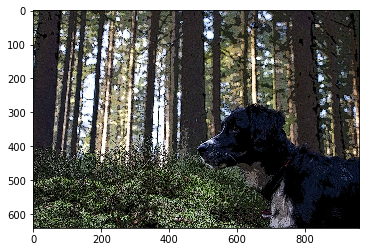

torch.Size([1, 21, 224, 224])
(224, 224)
[ 0 12]


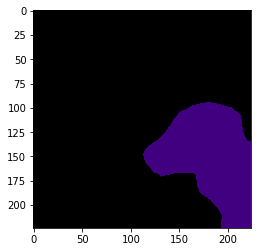

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
 
#!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./dog.jpg')
plt.imshow(img); plt.show()

# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

# Pass the input through the net
out = fcn(inp)['out']
print (out.shape)

import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

# Define the helper function
def decode_segmap(image, nc=21):
   
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
 
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
   
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
     
  rgb = np.stack([r, g, b], axis=2)
  return rgb

rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

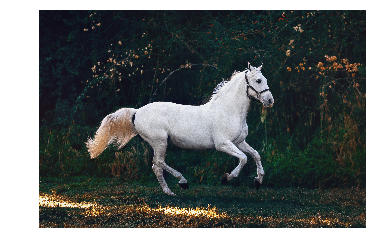

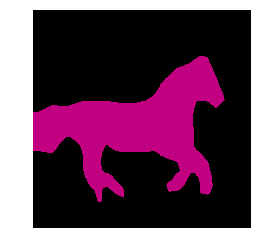

In [12]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()
segment(fcn, './horse.jpeg')

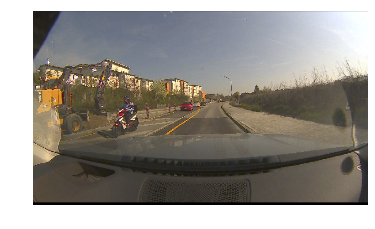

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [17]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()
segment(dlab, './dashcam.png')


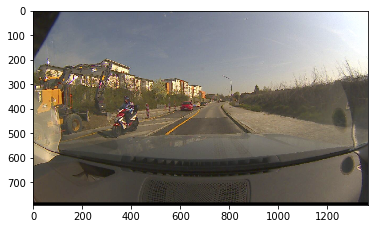

Segmenatation Image on FCN


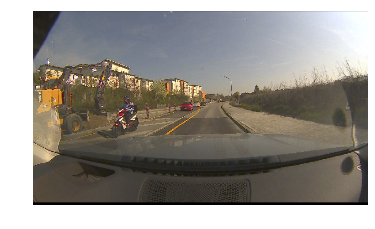

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 0

In [20]:
img = Image.open('./dashcam.png')
plt.imshow(img); plt.show()
 
print ('Segmenatation Image on FCN')
segment(fcn, path='./dashcam.png')
 
print ('Segmenatation Image on DeepLabv3')
segment(dlab, path='./dashcam.png')